In [1]:
#!pip install poppy

In [9]:
import numpy as np
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
import astropy.units as u
import poppy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
pth_to_gbd = 'gbdpsf_165um_unobscured_OF17_150beams_1mmdet.fits'
pth_to_huy = 'huypsf_165um_unobscured_1024pupil_256pix_1mmdet.txt'

gbdpsf = fits.open(pth_to_gbd)[0].data**2
gbdpsf /= np.sum(gbdpsf)
huypsf = np.genfromtxt(pth_to_huy,encoding='UTF-16',skip_header=21,delimiter='\t')
huypsf /= np.sum(huypsf)
huypsf = shift(huypsf,[.5,-.5])

## Compare GBD with ZMX Huygens

<ipython-input-55-eeae206016bb>:38: RuntimeWarning: divide by zero encountered in true_divide
  im = ax[2].imshow((arr1-arr2)/arr2, cmap=cmap3,vmin=-1,vmax=1)


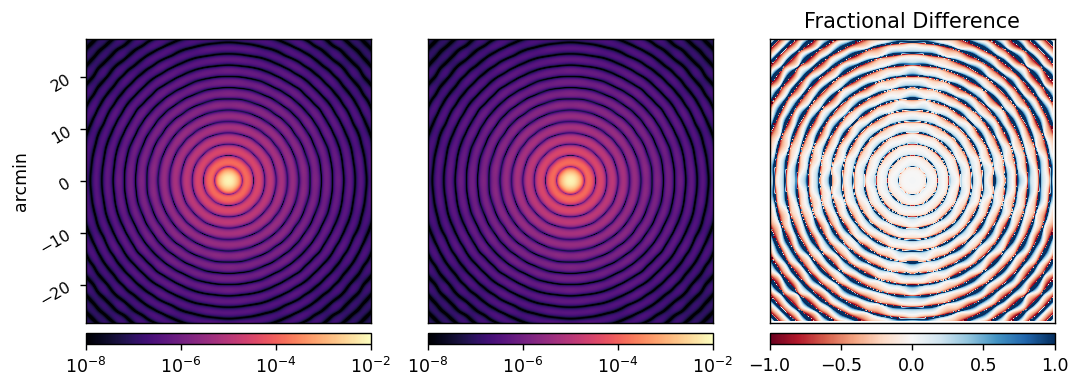

In [55]:
def compare2PSF(arr1, arr2,
              title1=None, title2=None, title3='Difference', suptitle='PSF Comparison', titlesize=12,
              npix=None, 
              pxscl=None, 
              use_ylabel1=True, use_ylabel2=False, use_ylabel3=False,
              cmap1='magma', cmap2='magma', cmap3='RdBu',
              vmin=None,vmax=None, 
              display_fig=True, 
              return_fig=False, 
              figsize=(10,4), dpi=125, wspace=0.25):
    
    fig,ax = plt.subplots(ncols=3,figsize=figsize,dpi=dpi)
#     plt.suptitle(suptitle)

    if pxscl is not None:
        extent = arr1.shape[0]/2*pxscl * 1e3
    
    im = ax[0].imshow(arr1, cmap=cmap1, norm=LogNorm(vmin=vmin,vmax=vmax),extent=[-extent,extent,-extent,extent])
    ax[0].set_xticks([])
    ax[0].tick_params(axis='x', labelsize=9, rotation=30)
    ax[0].tick_params(axis='y', labelsize=9, rotation=30)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("bottom", size="4%", pad=0.075)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    ax[0].set_ylabel('arcmin')
    ax[0].set_title(title1)
    
    im = ax[1].imshow(arr1, cmap=cmap2, norm=LogNorm(vmin=vmin,vmax=vmax))
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].tick_params(axis='x', labelsize=9, rotation=30)
    ax[1].tick_params(axis='y', labelsize=9, rotation=30)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("bottom", size="4%", pad=0.075)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    ax[1].set_title(title2)
    
    im = ax[2].imshow((arr1-arr2)/arr2, cmap=cmap3,vmin=-1,vmax=1)
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].tick_params(axis='x', labelsize=9, rotation=30)
    ax[2].tick_params(axis='y', labelsize=9, rotation=30)
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("bottom", size="4%", pad=0.075)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    ax[2].set_title('Fractional Difference')
    
def ComputeRMSDiff(arr1,arr2):
    diff = arr1-arr2
    mean = np.mean(diff)
    diff -= mean
    return np.std(diff)
    
    

compare2PSF(gbdpsf,huypsf,pxscl=3.6e-6/57.6*206265/60,vmin=1e-8,vmax=1e-2)

## Now try a comparison with Airy Analytical

In [49]:
pixscal = 3.9065e-6
efl = 57.6

airy=poppy.misc.airy_2d(diameter=2.4, wavelength=1.65e-6,
                              shape=(256,256), pixelscale=pixscal/efl*206265,
                             center=(127.5,127.5))

airy /= np.sum(airy)

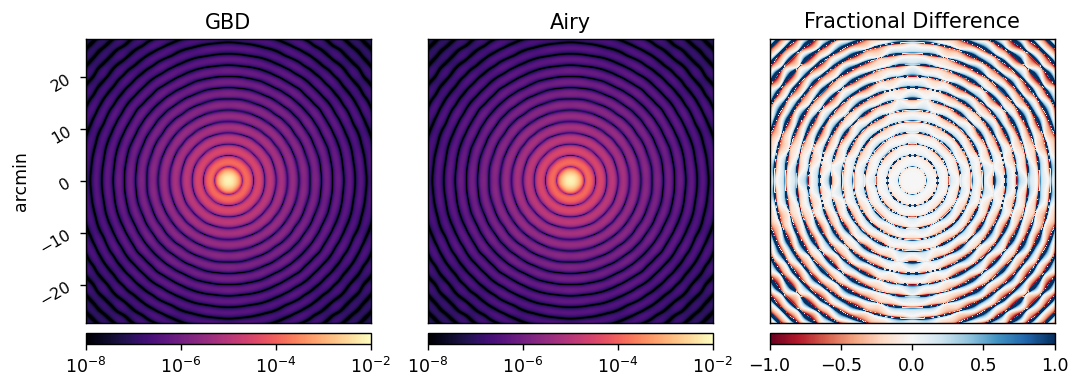

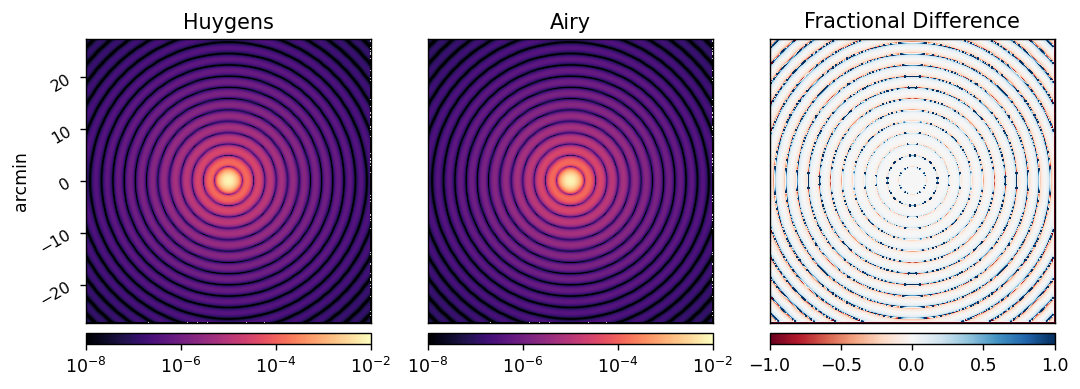

In [51]:
compare2PSF(gbdpsf,airy,pxscl=3.6e-6/57.6*206265/60,vmin=1e-8,vmax=1e-2,title1='GBD',title2='Airy')
compare2PSF(huypsf,airy,pxscl=3.6e-6/57.6*206265/60,vmin=1e-8,vmax=1e-2,title1='Huygens',title2='Airy')

In [56]:
print(ComputeRMSDiff(gbdpsf,airy))
print(ComputeRMSDiff(huypsf,airy))

1.3618588100616955e-06
3.706123387929372e-07


AttributeError: 'numpy.ndarray' object has no attribute 'get'

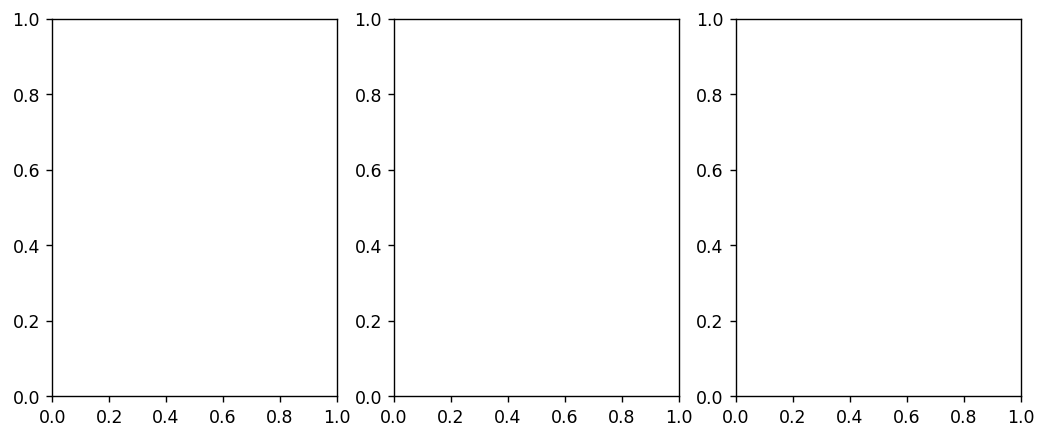